In [ ]:
# ..... try integration with scanorama ..... #

In [1]:
import scanorama
import scanpy 
import pandas as pd
import numpy as np

In [2]:
# adata1 = scanpy.read_h5ad("stage16_sample1.h5ad")
# adata2 = scanpy.read_h5ad("stage16_sample2.h5ad")
# adata3 = scanpy.read_h5ad("stage16_sample3.h5ad")

# # List of datasets:
# adatas = [ adata1, adata2, adata3 ]

adata1 = scanpy.read_h5ad("stage9_sample1_hvg.h5ad")
adata2 = scanpy.read_h5ad("stage9_sample2_hvg.h5ad")
adata3 = scanpy.read_h5ad("stage9_sample3_hvg.h5ad")

adata4 = scanpy.read_h5ad("stage13_sample1_hvg.h5ad")
adata5 = scanpy.read_h5ad("stage13_sample2_hvg.h5ad")
adata6 = scanpy.read_h5ad("stage13_sample3_hvg.h5ad")

adata7 = scanpy.read_h5ad("stage16_sample1_hvg.h5ad")
adata8 = scanpy.read_h5ad("stage16_sample2_hvg.h5ad")
adata9 = scanpy.read_h5ad("stage16_sample3_hvg.h5ad")

# List of datasets:
adatas = [ adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9 ]

In [3]:
# Integration and Batch-correction
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred = True)

Found 3439 genes among all datasets
[[0.         0.49718257 0.49023921 0.38240026 0.33523153 0.22106131
  0.35496288 0.30116396 0.30052241]
 [0.         0.         0.62546957 0.26480051 0.4219991  0.16213389
  0.12211982 0.17619401 0.10825264]
 [0.         0.         0.         0.43935006 0.5161097  0.24013748
  0.24622958 0.21488081 0.20552103]
 [0.         0.         0.         0.         0.4293758  0.43452381
  0.36695624 0.35022523 0.30791506]
 [0.         0.         0.         0.         0.         0.45337717
  0.39457515 0.43428743 0.32099505]
 [0.         0.         0.         0.         0.         0.
  0.41646742 0.32053198 0.26492268]
 [0.         0.         0.         0.         0.         0.
  0.         0.48376623 0.60846943]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.52261888]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (6, 8)
Proce

/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])
/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])
/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, 

In [4]:
adata_corrected = scanpy.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",    
    index_unique="-",
)

/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_core/merge.py:847: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  concat_indices = concat_indices.str.cat(label_col.map(str), sep=index_unique)


In [5]:
adata_corrected

AnnData object with n_obs × n_vars = 80893 × 3439
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'stage', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet', 'dataset', 'consensus_type', 'library_id'
    obsm: 'X_pca', 'X_umap', 'X_scanorama'

In [6]:
scanpy.pp.neighbors(adata_corrected, use_rep="X_scanorama")
scanpy.tl.umap(adata_corrected)
scanpy.tl.leiden(
    adata_corrected, key_added="clusters", n_iterations=2
)

/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/minico

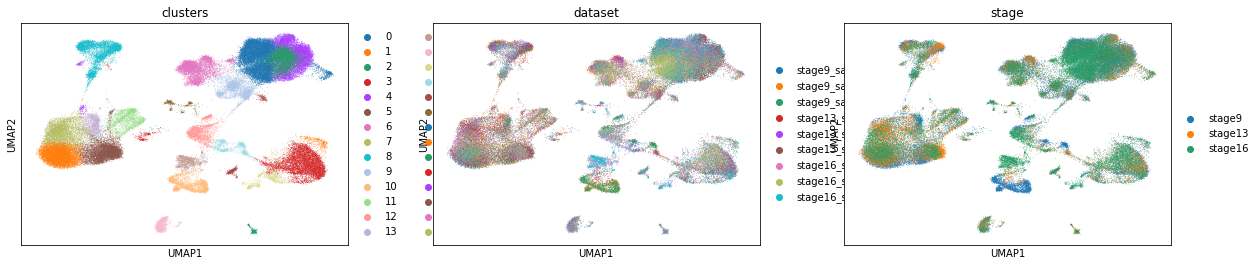

In [11]:
scanpy.pl.umap(
    adata_corrected, color=["clusters", "dataset", "stage"], palette=scanpy.pl.palettes.default_20
)

/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


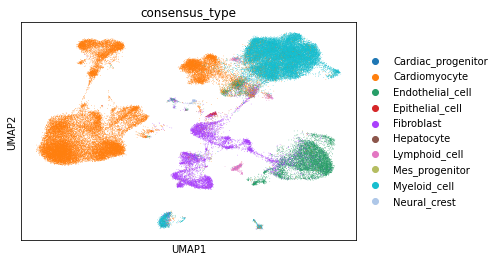

In [8]:
scanpy.pl.umap(
    adata_corrected, color="consensus_type", palette=scanpy.pl.palettes.default_20
)

In [9]:
# save anndata object
adata_corrected.write_h5ad('lizard_scanorama.h5ad')

# save embeddings and clusters from Scanorama
np.savetxt('lizard_scanorama_pca.csv', adata_corrected.obsm['X_scanorama'], delimiter=",")
np.savetxt('lizard_scanorama_umap.csv', adata_corrected.obsm['X_umap'], delimiter=",")
pd.DataFrame(adata_corrected.obs['clusters']).to_csv('lizard_scanorama_clusters.csv')

In [2]:
adata1 = scanpy.read_h5ad("lizard_scanorama.h5ad")

/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


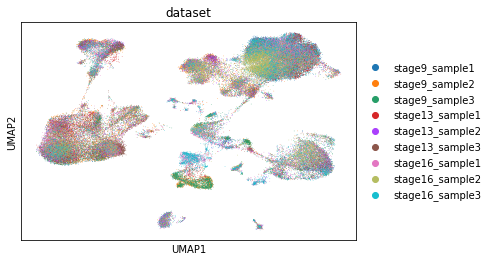

/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


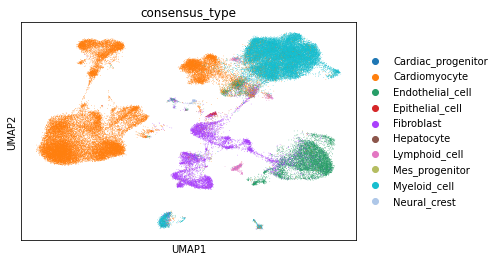

/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/suresh/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


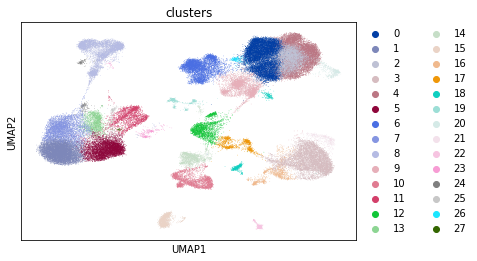

In [3]:
scanpy.pl.umap(adata1, color="dataset",  
               save='aa-lizard_batch.png')
# scanpy.pl.umap(adata1, color="stage", 
#                save='aa-lizard_stage.png')
scanpy.pl.umap(adata1, color="consensus_type", palette=scanpy.pl.palettes.default_20,
               save='aa-lizard_shared.png')
scanpy.pl.umap(adata1, color="clusters", palette=scanpy.pl.palettes.default_28,
               save='aa-lizard_leiden.png')

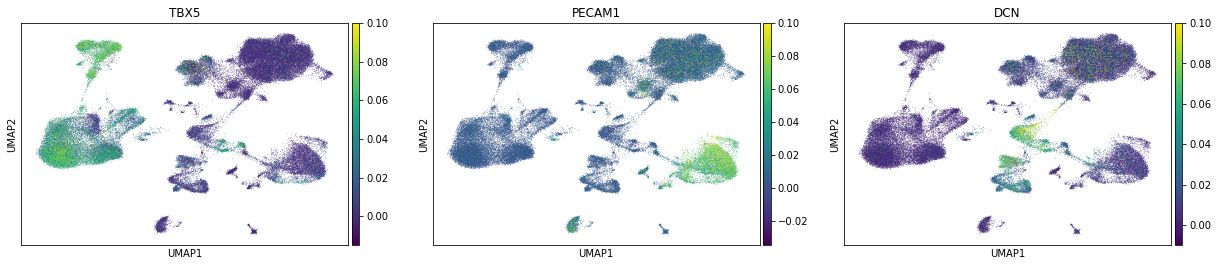

In [34]:
scanpy.pl.umap(adata1, color=["TBX5", "PECAM1", "DCN"], vmax = 0.1,
              save='aa-lizard_exp.png')